In [11]:
import torch
import numpy as np
from sklearn.datasets import fetch_openml

In [5]:
mnist = fetch_openml('mnist_784', version=1,)
x = mnist.data/255
y = mnist.target

'5'

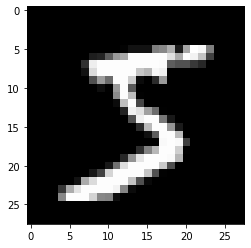

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x[0].reshape(28, 28), cmap="gray")
y[0]

In [69]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
y = np.array([int(y_i) for y_i in y])
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

x_train = torch.Tensor(x_train)
x_test = torch.Tensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.Tensor(y_test)

ds_train = TensorDataset(x_train, y_train)
ds_test = TensorDataset(x_test, y_test)

tr_loader = DataLoader(ds_train, batch_size=64, shuffle=True)
te_loader = DataLoader(ds_test, batch_size=64, shuffle=False)

In [70]:
import torch.nn as nn
class mlp(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28*1, 100),
            nn.ReLU(),
            nn.Linear(100,100),
            nn.ReLU(),
            nn.Linear(100,10)
        )
        
    def forward(self, x):
        y = self.model(x)
        return y
    
model = mlp()

In [71]:
from torch import optim
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [72]:
def train(epoch):
    model.train()
    for data, targets in tr_loader:
        optimizer.zero_grad()
        out = model(data)
        loss = loss_fn(out, targets)
        loss.backward()
        optimizer.step()
    print(f'{epoch} epoch finished')



In [73]:
def test():
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, targets in te_loader:
            out = model(data)
            _, pred = torch.max(out.data, 1)
            correct += pred.eq(targets.data.view_as(pred)).sum()
            
    data_num = len(te_loader.dataset)
    print(f'テストデータの正解数 {correct}/{data_num}({100.*correct/data_num})')

In [74]:
test()

テストデータの正解数 1394/14000(9.95714282989502)


In [75]:
for epoch in range(3):
    train(epoch)
test()

0 epoch finished
1 epoch finished
2 epoch finished
テストデータの正解数 13396/14000(95.68571472167969)


pred 6, true 6.0


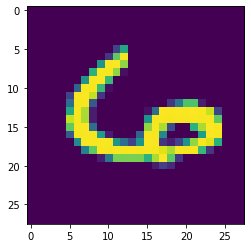

In [79]:
index = 2020
model.eval()

data = x_test[2020]
out = model(data)
_, pred = torch.max(out.data, 0)
plt.imshow(x_test[2020].reshape(28, 28))
print(f'pred {pred}, true {y_test[2020]}')